In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
data = pd.read_excel('10.xls',sheet_name="监测数据报表",skiprows=2,parse_dates=['监测时间'],engine='openpyxl')  #读取excel表

In [3]:
data.drop(['备注','污水排口监控点排放量(吨)','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)   #删除NaN列
data.drop(0,inplace=True)  

In [4]:
data = data.set_index(['监测时间'])

In [5]:
data.drop(index=(data.loc[(data['PH值']=='停运')].index),inplace=True)

In [6]:
#显示函数
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def plot_data(test_result,predict_result):
    """
    test_result:真实值
    predict_result:预测值
    """
    plt.plot(test_result,color ='red',label = 'water element true value')
    plt.plot(predict_result,color ='blue',label = 'water element predicted value')
    plt.title("water element values")
    plt.xlabel("time")
    plt.ylabel("element values")
    plt.legend()
    plt.show()
data['化学需氧量(COD)(毫克/升)'] = data['化学需氧量(COD)(毫克/升)'].astype('float')
data['氨氮(毫克/升)'] = data['氨氮(毫克/升)'].astype('float')
data['PH值'] = data['PH值'].astype('float')


In [7]:
train_set = data[:'2020-06'].iloc[:,[2]].values
test_set = data['2020-07':].iloc[:,[2]].values

In [8]:
#正则化【0，1】
sc = MinMaxScaler(feature_range=[0,1])
train_set_scaled = sc.fit_transform(train_set)

In [9]:
#创建序列测试集
#720个时间步为一个样本，一个输出
#构造X_text,预测
train_set = sc.transform(data[:'2020-06'].iloc[:,[2]].values)
test_set = sc.transform(data['2020-07':].iloc[:,[2]].values)

def create_data(dataset, look_back):
    X_train, Y_train = [], []
    for i in range(len(dataset)-look_back):
        X_train.append(dataset[i:(i+look_back)])
        Y_train.append(dataset[look_back+i:look_back+i+1])
    return np.array(X_train),np.array(Y_train)
look_back = 720
X_train,Y_train  = create_data(train_set,look_back)
X_test,Y_test = create_data(test_set,look_back)

In [10]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [11]:
model.compile(optimizer = 'adam',loss ='mse', metrics=['mse', 'mae'])

model.fit(X_train,Y_train,epochs=10,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
102/102 [==============================] - 146s 1s/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0164 - val_loss: 3.2883e-04 - val_mse: 3.2883e-04 - val_mae: 0.0134
Epoch 2/10
102/102 [==============================] - 135s 1s/step - loss: 7.7694e-04 - mse: 7.7694e-04 - mae: 0.0109 - val_loss: 1.6177e-04 - val_mse: 1.6177e-04 - val_mae: 0.0054
Epoch 3/10
102/102 [==============================] - 139s 1s/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0112 - val_loss: 1.5952e-04 - val_mse: 1.5952e-04 - val_mae: 0.0055
Epoch 4/10
102/102 [==============================] - 139s 1s/step - loss: 4.5541e-04 - mse: 4.5541e-04 - mae: 0.0091 - val_loss: 1.9152e-04 - val_mse: 1.9152e-04 - val_mae: 0.0082
Epoch 5/10
102/102 [==============================] - 138s 1s/step - loss: 6.1951e-04 - mse: 6.1951e-04 - mae: 0.0100 - val_loss: 1.5820e-04 - val_mse: 1.5820e-04 - val_mae: 0.0065
Epoch 6/10
102/102 [==============================] - 140s 1s/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0097 -

In [12]:
predict = model.predict(X_test) 

In [13]:
predict_result = sc.inverse_transform(predict)
predict_result

array([[  4.963468  ],
       [  4.9018497 ],
       [  4.937076  ],
       [  4.981531  ],
       [  5.0201    ],
       [  5.1656384 ],
       [  5.364087  ],
       [  5.0954447 ],
       [  5.713706  ],
       [ 10.810181  ],
       [  2.4002528 ],
       [  7.9423494 ],
       [  5.77145   ],
       [  6.662663  ],
       [  6.4437885 ],
       [  6.5671015 ],
       [  6.5891514 ],
       [  6.577962  ],
       [  6.601154  ],
       [  6.6976156 ],
       [  6.7878304 ],
       [  6.6615014 ],
       [  6.6598554 ],
       [  6.568577  ],
       [  6.4150224 ],
       [  6.693751  ],
       [  6.993758  ],
       [  6.898623  ],
       [  7.327736  ],
       [  6.9917736 ],
       [  7.031775  ],
       [  7.046323  ],
       [  6.8116527 ],
       [  6.8278418 ],
       [  6.672579  ],
       [  7.002098  ],
       [  7.2135024 ],
       [  6.6941714 ],
       [  5.9021435 ],
       [  6.701623  ],
       [  6.4378805 ],
       [  6.8900213 ],
       [  7.3838234 ],
       [ 11

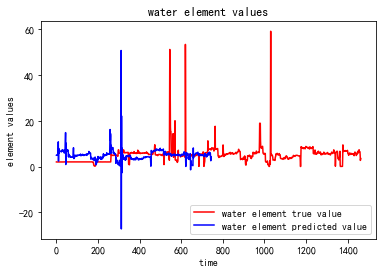

In [14]:
test_set = sc.inverse_transform(test_set)
plot_data(np.array(test_set),np.array(predict_result))

In [40]:
model.save("my_model2")

INFO:tensorflow:Assets written to: my_model2\assets


INFO:tensorflow:Assets written to: my_model2\assets
